# Jupyter Notebook demonstrating different Big O complexities

Below are examples of different Big O time complexities, with simple Python functions illustrating each case.

O(1): Constant time, unaffected by input size.

O(n): Linear time, grows in direct proportion to input length.

O(n²): Quadratic time, grows faster with larger inputs.

O(log n): Logarithmic time, more efficient for large inputs.

O(n log n): Often seen in efficient sorting algorithms like mergesort.

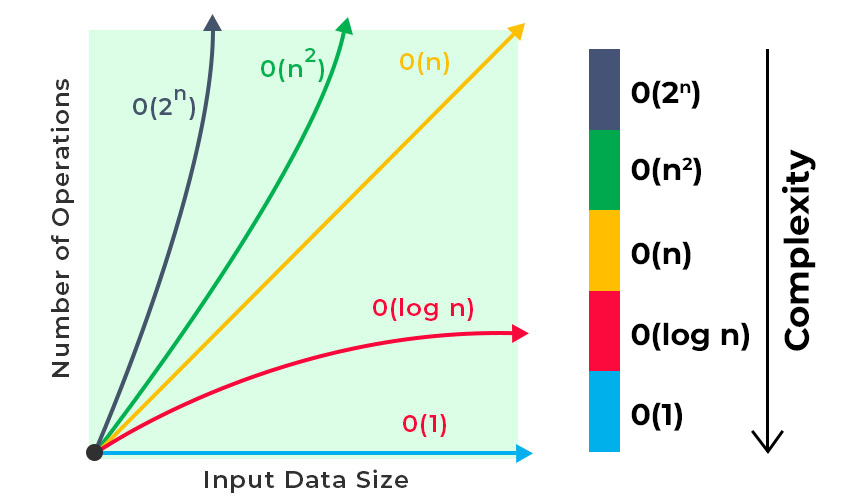

In [9]:
import time
import pandas as pd
import seaborn as sns

## Code cell: O(1) example

In [2]:

def constant_time_operation(n):
    # This function just returns the first element, regardless of input size
    return n[0]

In [3]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [5]:
constant_times = []

for l in list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = constant_time_operation(lst)
    toc = time.process_time()

    constant_times.append(toc-tic)

In [8]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['n', 'time'])
constant_df

,n,time
0,10,0.000013
1,100,0.000003
2,1000,0.000002
3,10000,0.000002
4,100000,0.000001
5,1000000,0.000011
6,10000000,0.000203


## Code cell: O(n) example

In [12]:
def linear_time_operation(data):
    # This function sums all elements in a list
    total = 0
    for value in data:
        total += value
    return total


In [13]:
linear_times = []

for l in list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = linear_time_operation(lst)
    toc = time.process_time()

    linear_times.append(toc-tic)

In [14]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['n', 'time'])
linear_df

,n,time
0,10,0.000209
1,100,0.000005
2,1000,0.000033
3,10000,0.000320
4,100000,0.003181
5,1000000,0.028626
6,10000000,0.213001


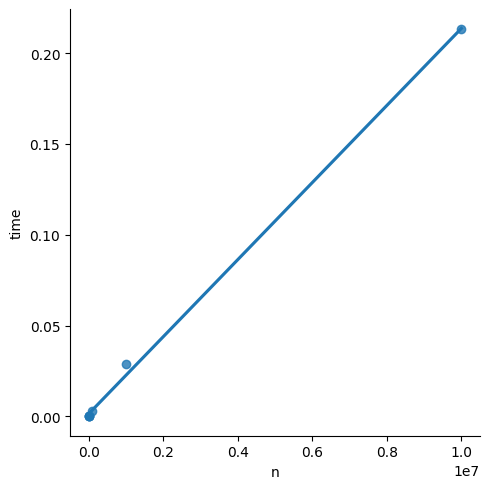

In [16]:
_ = sns.lmplot(x='n', y='time', data=linear_df, ci=None)


## Code cell: O(log n) example

In [2]:
def logarithmic_time_operation(n):
    # This function repeatedly halves n until it becomes zero
    count = 0
    while n > 1:
        n = n // 2
        count += 1
    return count


In [3]:
log_times = []

for l in list_lengths:

    tic = time.process_time()
    x = logarithmic_time_operation(l)
    toc = time.process_time()

    log_times.append(toc-tic)

NameError: name 'list_lengths' is not defined

In [21]:
log_df = pd.DataFrame(list(zip(list_lengths, log_times)), columns=['n', 'time'])
log_df

,n,time
0,10,1.500000e-05
1,100,3.000000e-06
2,1000,2.000000e-06
3,10000,1.000000e-06
4,100000,1.000000e-06
5,1000000,2.000000e-06
6,10000000,2.000000e-06


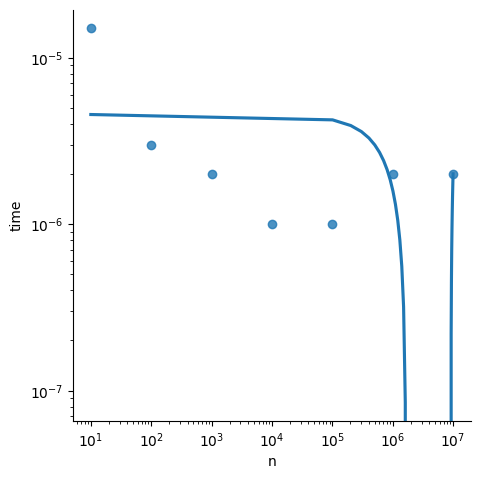

In [23]:
import matplotlib.pyplot as plt

# Plot time vs n on a log scale with lmplot
g = sns.lmplot(x='n', y='time', data=log_df, ci=None, order=2)
g.set(xscale='log', yscale='log')
plt.show()

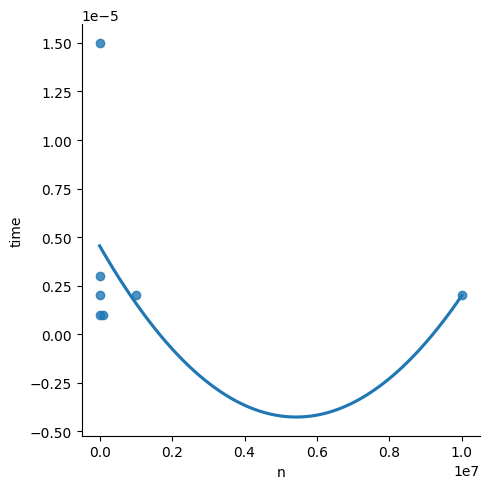

In [22]:
_ = sns.lmplot(x='n', y='time', data=log_df, ci=None, order=2, )

## O(n^2) example

In [25]:
def quadratic_time_operation(data):
    # This function compares each element with every other element
    count = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i] == data[j]:
                count += 1
    return count


In [29]:
poly_times = []

for l in list_lengths[:4]:
    lst = [42]*l

    tic = time.process_time()
    x = quadratic_time_operation(lst)
    toc = time.process_time()

    poly_times.append(toc-tic)

In [30]:
poly_df = pd.DataFrame(list(zip(list_lengths[:4], poly_times)), columns=['n', 'time'])
poly_df

,n,time
0,10,0.000013
1,100,0.000459
2,1000,0.047698
3,10000,4.572593


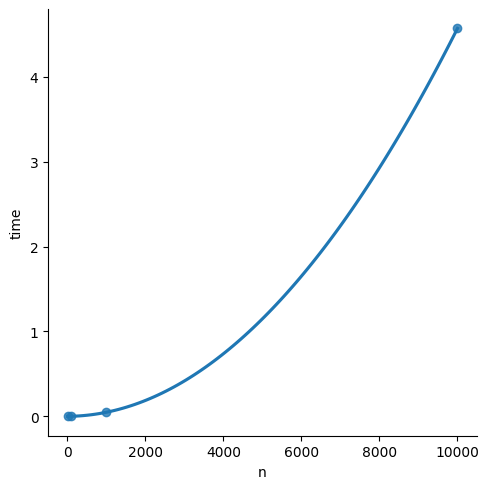

In [31]:
_ = sns.lmplot(x='n', y='time', data=poly_df, ci=None, order=2)

##  O(n log n) example

In [ ]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged


In [32]:

# A typical example is merge sort or quicksort. We'll use sorted() for simplicity:
def n_log_n_time_operation(data):
    return sorted(data)

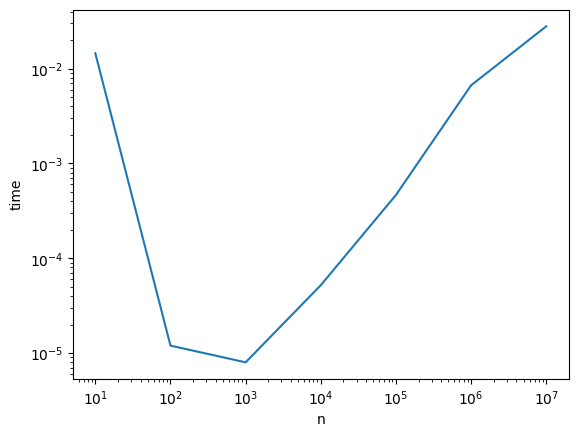

In [34]:
n_log_n_times = []
for l in list_lengths:
    data = [42]*l
    start = time.process_time()
    _ = n_log_n_time_operation(data)
    end = time.process_time()
    n_log_n_times.append(end - start)

nlogn_df = pd.DataFrame(list(zip(list_lengths, n_log_n_times)), columns=['n', 'time'])

sns.lineplot(data=nlogn_df, x='n', y='time')
plt.xscale('log')
plt.yscale('log')
plt.show()